# Summer of Code - Artificial Intelligence

## Week 08: Deep Learning

### Day 03: Implementing a Neural Network

In this notebook, we will implement a **feedforward neural networks** using PyTorch.


# FashionMNIST Dataset

The FashionMNIST dataset is a collection of grayscale images of clothing items, such as shirts, pants, and shoes. It consists of 60,000 training images and 10,000 test images, each of size 28x28 pixels.


In [1]:
from torchvision import datasets

fmnist_train = datasets.FashionMNIST(
    root='data/', train=True, download=True
)

fmnist_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [2]:
datasets.FashionMNIST.__mro__

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.MNIST,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

## PyTorch Dataset

<img src="dataset.png" alt="Dataset Structure" width="600"/>


In [3]:
len(fmnist_train)

60000

In [4]:
fmnist_train[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [5]:
classes = fmnist_train.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
a = [1, 2, 3]

c = ['a', 'b', 'c']

list(zip(a, c))

[(1, 'a'), (2, 'b'), (3, 'c')]

## Visualizing the Dataset


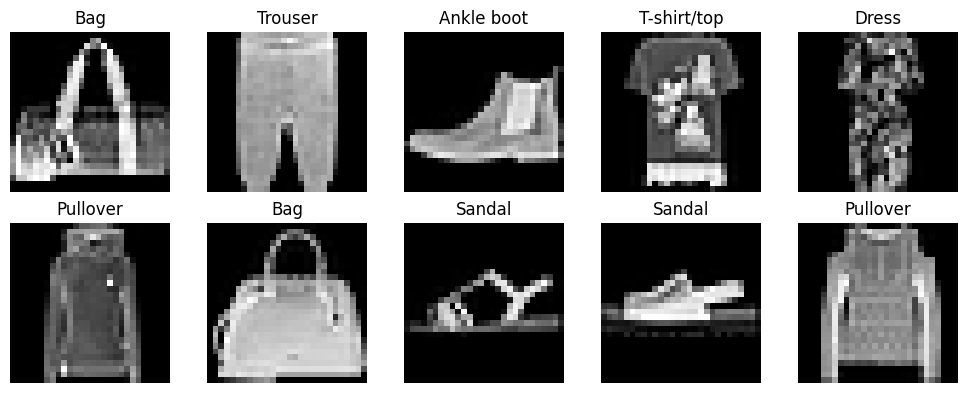

In [7]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.random.randint(0, len(fmnist_train), size=(10, ))

rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
for ax, idx in zip(axes.flatten(), indices):
    image, label = fmnist_train[idx]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"{classes[label]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
type(image)

PIL.Image.Image

In [9]:
np.array(image).shape

(28, 28)

## Transforming the Data


In [10]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [11]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

## DataLoader

<img src="dataloader.png" alt="DataLoader Structure" width="600"/>


In [12]:
from torch.utils.data import DataLoader

fmnist_train.transform = train_transform

batch_size = 64
train_loader = DataLoader(
    fmnist_train, batch_size=batch_size, shuffle=True
)

len(train_loader)

938

# Developing the Neural Network

There are two main ways to define a neural network in PyTorch:

1. using `torch.nn.Sequential`
2. by creating a custom class that inherits from `torch.nn.Module`

<img src="fully_connected_model.png" alt="Fully Connected Neural Network" width="600"/>


In [13]:
import torch
from torch import nn


class FeedForwardNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.output_layer = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

simple_model = FeedForwardNet()

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
simple_model.to(device)

FeedForwardNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [15]:
from torchsummary import summary

summary(simple_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


## Getting Prediction from the Model

Initially, the model is untrained, so the predictions will be random.


Ankle boot


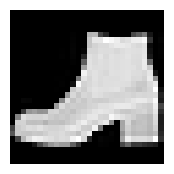

In [19]:
test_image, test_label = fmnist_train[122]
print(classes[test_label])
plt.figure(figsize=(2,2))
plt.imshow(test_image.squeeze(), cmap='gray')
plt.axis("off")
plt.show()

In [24]:
test_image = test_image.to(device)
predictions = simple_model(test_image)
predictions


tensor([[-0.3088, -0.0815,  0.0145, -0.0629, -0.2338,  0.2280,  0.5723, -0.1119,
         -0.1947,  0.1886]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [27]:
predicted_label = torch.argmax(predictions, dim=1)
predicted_label

tensor([6], device='cuda:0')

In [28]:
classes[predicted_label] # wrong prediction

'Shirt'

## Training the Model

The training process involves the following steps:

1. **Forward Pass:** Input data is passed through the model to obtain predictions.
2. **Loss Calculation:** The difference between the predicted outputs and the actual labels is calculated using a loss function.
3. **Backward Pass:** Gradients are computed using backpropagation.
4. **Parameter Update:** The model's parameters are updated using an optimizer based on the computed gradients.

<img src="learning_process.png" alt="Training Process" width="600"/>


### Cross Entropy Loss
Entropy Loss is commonly used for multi-class classification problems. It measures the difference between the predicted probability distribution and the true distribution (one-hot encoded labels).
Mathematically, for a single sample, the Cross Entropy Loss is defined as:
$$L = -\sum_{i=1}^{C} y_i \log(p_i)$$
where:
- $C$ is the number of classes,
- $y_i$ represents the true label for class $i$ (1 if the class is the correct class, 0 otherwise),
- $p_i$ is the predicted probability for class $i$.

In [30]:
loss_fn = nn.CrossEntropyLoss()

In [31]:
from torch import optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

In [32]:
optimizer = optim.SGD(simple_model.parameters(), lr=0.01)

In [33]:
epochs = 5
train_losses = []
train_accuracies = []

simple_model.train()
for i in range(epochs):
    correct = 0
    total = 0
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward Pass
        outputs = simple_model(images)
        loss = loss_fn(outputs, labels)
        
        # Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate metrics
        running_loss += loss.item() * images.size(0)
        predicted_labels = torch.argmax(outputs, dim=1)
        correct += (predicted_labels == labels).sum().item()
        total += labels.size(0)

    train_losses.append(running_loss / total)
    train_accuracies.append(correct / total)
    
    print(f"Epoch [{i+1}/{epochs}], Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.4f}")


Epoch [1/5], Loss: 0.8161, Accuracy: 0.7328
Epoch [2/5], Loss: 0.5252, Accuracy: 0.8153
Epoch [3/5], Loss: 0.4748, Accuracy: 0.8324
Epoch [4/5], Loss: 0.4471, Accuracy: 0.8424
Epoch [5/5], Loss: 0.4285, Accuracy: 0.8491


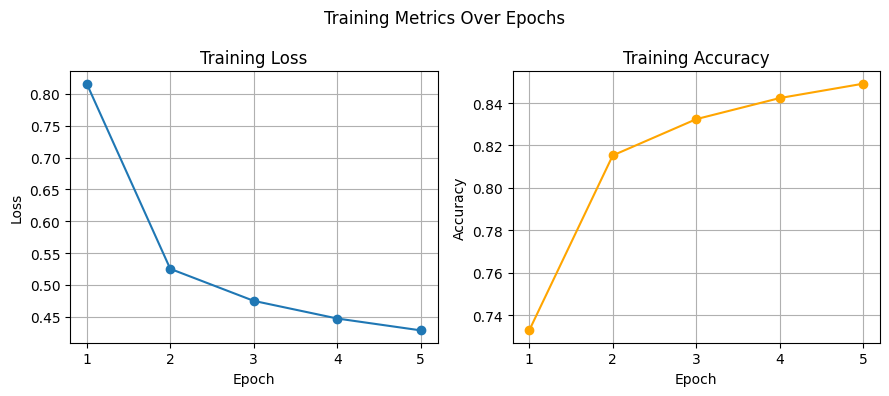

In [34]:
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, marker="o")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, marker="o", color="orange")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()

plt.suptitle("Training Metrics Over Epochs")
plt.tight_layout()
plt.show()

## Evaluating the Model

In [35]:
fmnist_test = datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=train_transform
)

fmnist_test

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [36]:
test_loader = DataLoader(
    fmnist_test, batch_size=64, shuffle=False
)
len(test_loader)

157

In [50]:
a = [1, 2, 3]

b = [1, 2]

a.extend(b)
a

[1, 2, 3, 1, 2]

In [37]:
simple_model.eval()
y_pred = []
with torch.no_grad():
    correct = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = simple_model(images)
        predicted_labels = torch.argmax(outputs, dim=1)
        correct += (predicted_labels == labels).sum().item()
        y_pred.extend(predicted_labels.cpu().numpy())
    test_accuracy = correct / len(fmnist_test)
    
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8366


In [42]:
y_pred = [int(label) for label in y_pred]
print(f"Actual labels: {fmnist_test.targets[:20].tolist()}")
print(f"Predicted labels: {y_pred[:20]}")

Actual labels: [9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0]
Predicted labels: [9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0]


In [43]:
from sklearn.metrics import classification_report

print(classification_report(fmnist_test.targets.numpy(), y_pred, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.82      0.80      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.74      0.73      0.73      1000
       Dress       0.84      0.85      0.85      1000
        Coat       0.71      0.79      0.75      1000
      Sandal       0.91      0.91      0.91      1000
       Shirt       0.63      0.53      0.58      1000
     Sneaker       0.90      0.91      0.90      1000
         Bag       0.92      0.95      0.93      1000
  Ankle boot       0.92      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.84     10000
weighted avg       0.83      0.84      0.84     10000



<Figure size 800x600 with 0 Axes>

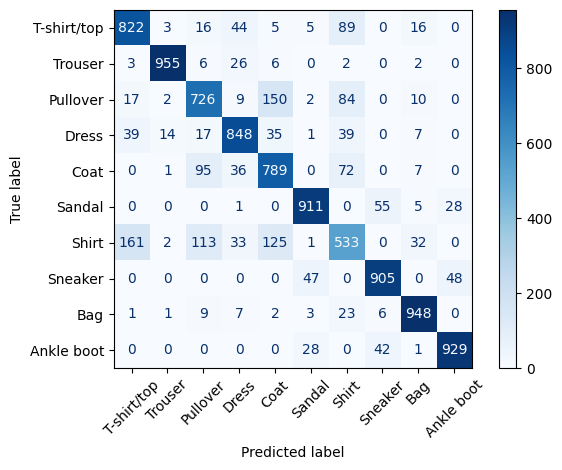

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    fmnist_test.targets.numpy(),
    y_pred,
    display_labels=classes,
    cmap=plt.cm.Blues,
    xticks_rotation=45
)
plt.tight_layout()
plt.show()

## Inference on New Data

In [153]:
from PIL import Image

test_image = Image.open("ankle_boot.png").convert("RGB")
test_image = np.array(test_image)
test_image.shape

(630, 739, 3)

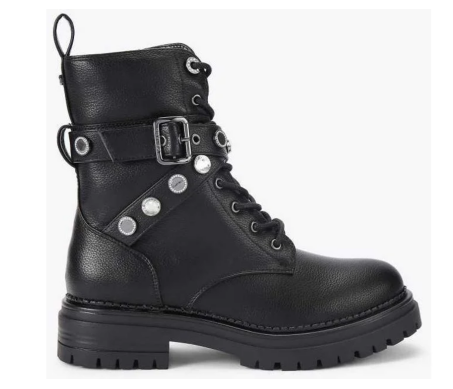

In [154]:
plt.imshow(test_image)
plt.axis("off")
plt.show()

In [155]:
custom_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.Normalize((0.5,), (0.5,))
])

test_image = custom_transform(test_image)
test_image.shape

torch.Size([1, 28, 28])

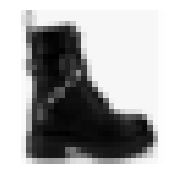

In [156]:
plt.figure(figsize=(2,2))
plt.imshow(test_image.cpu().squeeze(), cmap='gray')
plt.axis("off")
plt.show()

In [157]:
with torch.no_grad():
    predicted_probas = simple_model(test_image.to(device))
predicted_probas


tensor([[-2.1756,  1.6230, -2.0256, -2.3350, -1.4450,  2.5695, -3.6618,  5.2906,
         -3.5301,  5.4209]], device='cuda:0')

In [ ]:
_, predicted_label = torch.max(predicted_probas, dim=1)
predicted_label.item()

9

In [159]:
classes[predicted_label.item()]

'Ankle boot'